In [117]:
# all library for processing data
import pandas as pd # lib for pandas dataframe
import math # lib math for using math operation
import matplotlib as plt # plotting library
import numpy as np # numpy array library
from scipy.interpolate import interp1d # lib for interopolation data
from sklearn.metrics import classification_report, confusion_matrix # lib for showing classification report and confusion matrix
from sklearn.model_selection import train_test_split # lib for splitting data training and data testing
import sys # lib system information
import collections
import itertools # import iterattion tools
from scipy.stats import mode #provides abstract base classes 
from dtw import dtw
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [118]:
def show_basic_dataframe_info(dataframe):

    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [119]:
import os
current_directory = os.getcwd()
data_list = []

for gesture in os.listdir(current_directory + "/GestureDataTomasV2"):
    sample_number=0
    for filename in os.listdir(current_directory + "/GestureDataTomasV2/"+ gesture):
        sample_number += 1
        with open (current_directory + "/GestureDataTomasV2/"+gesture+"/{}".format(filename), "r") as myfile:
            data=myfile.readlines()
            t = 1
            for row in data:
                row_data = eval(row)
                accX,accY,accZ = row_data[0]
                gyrX,gyrY,gyrZ = row_data[1]
                data_list.append([t,gesture, sample_number,accX,accY,accZ,gyrX,gyrY,gyrZ])
                t+=1
            
column_names = ["timestamp","label", "sample","accX","accY","accZ","gyrX","gyrY","gyrZ"]
df = pd.DataFrame(data=data_list,columns=column_names)

In [120]:
show_basic_dataframe_info(df)
df.head()

Number of columns in the dataframe: 9
Number of rows in the dataframe: 7132



,timestamp,label,sample,accX,accY,accZ,gyrX,gyrY,gyrZ
0,1,right,1,4499,15444,2349,-2,87,13
1,2,right,1,4481,15421,2380,-59,81,37
2,3,right,1,4481,15421,2380,-59,81,37
3,4,right,1,4481,15421,2380,-59,81,37
4,5,right,1,4481,15421,2380,-59,81,37


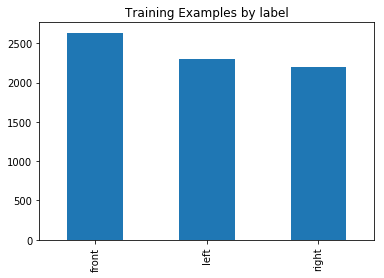

In [121]:
# Show how many training examples exist for each of the six activities
df['label'].value_counts().plot(kind='bar',
                                   title='Training Examples by label')
plt.show()

In [122]:
import matplotlib.pyplot as plt

defaultColors = ['b', 'r', 'k', 'g', 'm']
def plotDatasets(datasets, axes, title, xlabel, colors=defaultColors):
    if len(datasets) > len(colors):
       print('Too many datasets. Max %s.' % (len(colors)))
       return
    if len(datasets) != len(axes):
       print('Number of datasets and axis names must match.')
       return
    for i in range(len(datasets)):
       color = '%s-' % colors[i]
       plt.plot(range(len(datasets[i])), datasets[i], color, label=axes[i])
    plt.xlabel(xlabel)
    plt.grid()
    plt.title(title)
    plt.legend()
    plt.subplots_adjust(hspace=0.35)
    plt.rcParams['figure.figsize'] = [10, 8]
    plt.show()

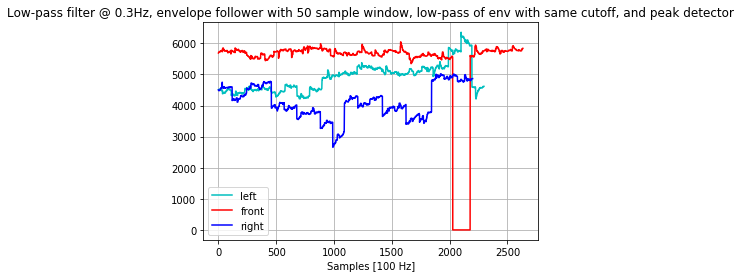

In [123]:
left = list(df[df["label"]=="left"]["accX"].values)
front = list(df[df["label"]=="front"]["accX"].values)
right = list(df[df["label"]=="right"]["accX"].values)

plotDatasets([left, front, right], 
            ["left", "front", "right"],
            'Low-pass filter @ 0.3Hz, envelope follower with 50 sample window, low-pass of env with same cutoff, and peak detector',
            'Samples [%s Hz]' % (100),
            ['c', 'r', 'b'])